Merged Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  
K: 2, DB Index: 0.9442
K: 3, DB Index: 0.8171
K: 4, DB Index: 0.7437
K: 5, DB Index: 0.7970
K: 6, DB Index: 0.7967
K: 7, DB Index: 0.7032
K: 8, DB In

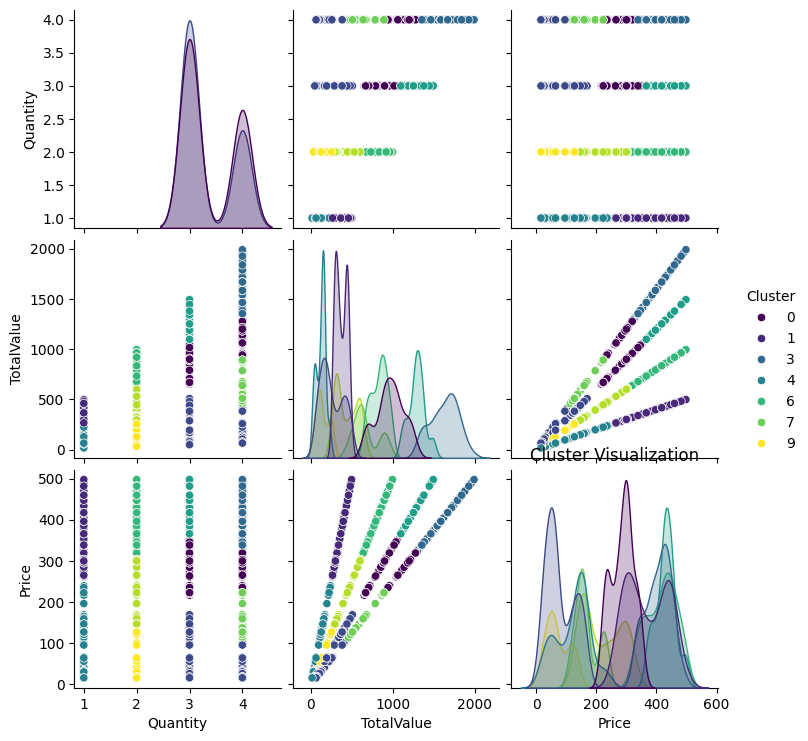

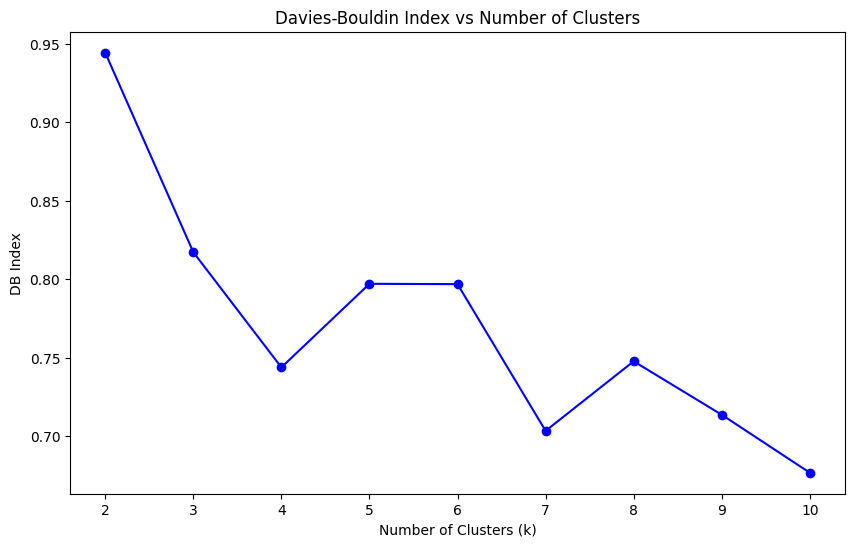

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('/content/drive/MyDrive/projects/E-Commerce Data Science Project/Customers.csv')
transactions = pd.read_csv('/content/drive/MyDrive/projects/E-Commerce Data Science Project/Transactions.csv')  # Replace with your file path if different

# Merge datasets on 'CustomerID' (adjust column names as necessary)
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')

# Inspect merged data
print("Merged Dataset:")
print(merged_data.head())

# Select features for clustering (numerical only)
# You can customize this selection based on your dataset's structure
features = merged_data.select_dtypes(include=['float64', 'int64'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering for 2-10 clusters and calculate DB Index
db_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    db_index = davies_bouldin_score(scaled_features, clusters)
    db_scores.append(db_index)
    print(f"K: {k}, DB Index: {db_index:.4f}")

# Find the optimal number of clusters (minimum DB Index)
optimal_k = k_values[db_scores.index(min(db_scores))]
print(f"Optimal number of clusters based on DB Index: {optimal_k}")

# Final KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters using a pair plot (if dataset is 2D/3D)
sns.pairplot(merged_data, hue='Cluster', palette='viridis')
plt.title('Cluster Visualization')
plt.show()

# Visualize DB Index vs. Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(k_values, db_scores, marker='o', color='b')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('DB Index')
plt.xticks(k_values)
plt.show()
